## Perustason Pandas-esimerkkejä

Tämä muistikirja opastaa sinut läpi joitakin hyvin perustason Pandas-konsepteja. Aloitamme tuomalla tyypilliset data-analytiikan kirjastot:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Sarjat

Sarja on kuin lista tai yksidimensionaalinen taulukko, mutta siinä on indeksi. Kaikki toiminnot ovat indeksiin kohdistettuja.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Yksi sarjojen yleisistä käyttötavoista on **aikasarjat**. Aikasarjoissa indeksillä on erityinen rakenne - tyypillisesti joukko päivämääriä tai aikaleimoja. Tällaisen indeksin voi luoda `pd.date_range`-funktiolla.

Oletetaan, että meillä on sarja, joka näyttää ostettujen tuotteiden määrän joka päivä, ja tiedämme, että joka sunnuntai meidän täytyy ottaa yksi tuote itsellemme. Näin voimme mallintaa sen sarjojen avulla:


Length of index is 366


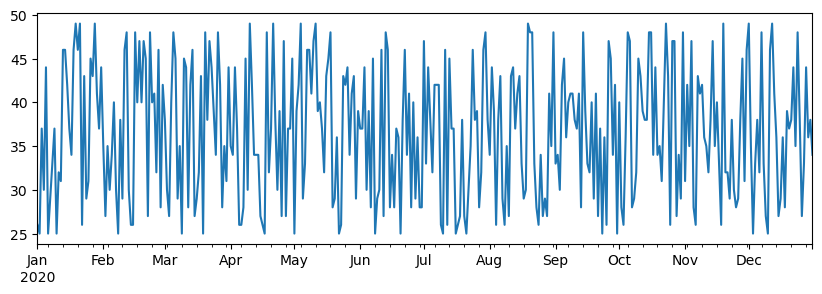

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Kuten näet, meillä on ongelmia täällä, koska viikoittaisessa sarjassa mainitsemattomia päiviä pidetään puuttuvina (`NaN`), ja `NaN`:n lisääminen numeroon antaa meille `NaN`. Jotta saamme oikean tuloksen, meidän täytyy määrittää `fill_value` sarjoja lisätessä:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


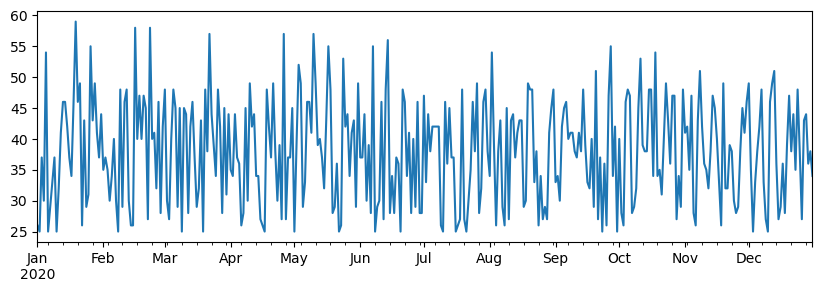

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

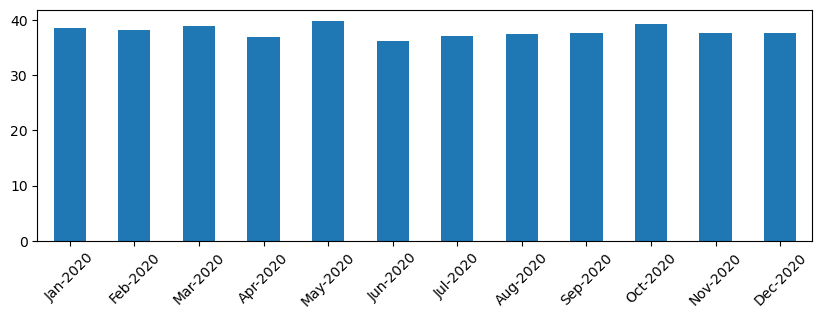

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame on pohjimmiltaan kokoelma sarjoja, joilla on sama indeksi. Voimme yhdistää useita sarjoja yhteen DataFrameen. Annetaan `a` ja `b` sarjat, jotka on määritelty yllä:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Voimme myös käyttää Sarjoja sarakkeina ja määrittää sarakenimet sanakirjan avulla:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Sama tulos voidaan saavuttaa transponoimalla (ja sitten nimeämällä sarakkeet uudelleen, jotta ne vastaavat aiempaa esimerkkiä):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Sarakkeiden valitseminen** DataFramesta voidaan tehdä näin:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Rivien valitseminen** suodatusilmaisun perusteella:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Näin se toimii: lauseke `df['A']<5` palauttaa totuusarvosarjan, joka osoittaa, onko lauseke `True` vai `False` kullekin sarjan alkioille. Kun sarjaa käytetään indeksinä, se palauttaa DataFramen rivien osajoukon. Siksi ei ole mahdollista käyttää mielivaltaista Pythonin totuusarvolauseketta, esimerkiksi kirjoittamalla `df[df['A']>5 and df['A']<7]` olisi väärin. Sen sijaan sinun tulisi käyttää erityistä `&`-operaatiota totuusarvosarjoille:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Luodaan uusia laskettavia sarakkeita**. Voimme helposti luoda uusia laskettavia sarakkeita DataFrameemme käyttämällä intuitiivisia lausekkeita. Alla oleva koodi laskee A:n poikkeaman sen keskiarvosta.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Mitä itse asiassa tapahtuu, on se, että laskemme sarjaa ja sitten määritämme tämän sarjan vasemmalle puolelle, luoden toisen sarakkeen.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Rivien valitseminen numeroiden perusteella** voidaan tehdä käyttämällä `iloc`-rakennetta. Esimerkiksi, ensimmäisten 5 rivin valitseminen DataFramesta:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Ryhmittely** käytetään usein tuloksen saamiseksi, joka muistuttaa *pivot-taulukoita* Excelissä. Oletetaan, että haluamme laskea sarakkeen `A` keskiarvon jokaiselle annetulle `LenB`-arvolle. Silloin voimme ryhmitellä DataFramen `LenB` mukaan ja kutsua `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Jos meidän täytyy laskea keskiarvo ja ryhmän elementtien lukumäärä, voimme käyttää monimutkaisempaa `aggregate`-funktiota:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Tulostaminen ja visualisointi

Data Scientistin täytyy usein tutkia dataa, joten sen visualisointi on tärkeää. Kun DataFrame on suuri, haluamme monesti vain varmistaa, että kaikki sujuu oikein, tulostamalla ensimmäiset muutamat rivit. Tämä onnistuu kutsumalla `df.head()`. Jos suoritat sen Jupyter Notebookissa, se tulostaa DataFramen siistissä taulukkomuodossa.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Olemme myös nähneet `plot`-funktion käytön joidenkin sarakkeiden visualisointiin. Vaikka `plot` on erittäin hyödyllinen moniin tehtäviin ja tukee monia erilaisia kaaviotyyppejä `kind=`-parametrin avulla, voit aina käyttää raakaa `matplotlib`-kirjastoa piirtääksesi jotain monimutkaisempaa. Käsittelemme datan visualisointia yksityiskohtaisesti erillisissä kurssin oppitunneissa.


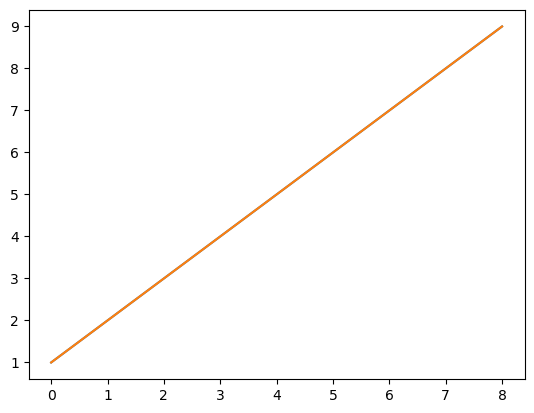

In [61]:
df['A'].plot()
plt.show()

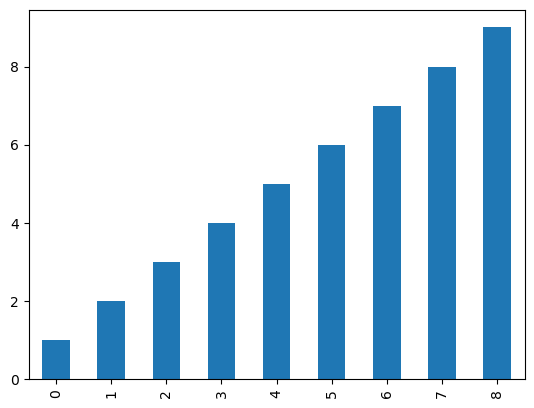

In [63]:
df['A'].plot(kind='bar')
plt.show()

Tämä yleiskatsaus kattaa Pandasin tärkeimmät käsitteet, mutta kirjasto on erittäin monipuolinen, eikä sen mahdollisuuksille ole rajoja! Käytetään nyt tätä tietoa tietyn ongelman ratkaisemiseksi.



---

**Vastuuvapauslauseke**:  
Tämä asiakirja on käännetty käyttämällä tekoälypohjaista käännöspalvelua [Co-op Translator](https://github.com/Azure/co-op-translator). Vaikka pyrimme tarkkuuteen, huomioithan, että automaattiset käännökset voivat sisältää virheitä tai epätarkkuuksia. Alkuperäistä asiakirjaa sen alkuperäisellä kielellä tulisi pitää ensisijaisena lähteenä. Kriittisen tiedon osalta suositellaan ammattimaista ihmiskäännöstä. Emme ole vastuussa väärinkäsityksistä tai virhetulkinnoista, jotka johtuvat tämän käännöksen käytöstä.
